# Data description 
Some plots to help understand better the problem domain and studied dataset.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import numpy as np


### Loading data

In [16]:
river = "RD_data/RD_VougaR_pg.csv"
data=pd.read_csv(river).values
name = river.split("_")[2].replace("R","")
X = data[:,2:4]
y = data[:,1]
dias = data[:,0]

temp = data[:,2]
prec = data[:,3]
print(X.shape)

(955, 2)


### Avarage monthly temperature 

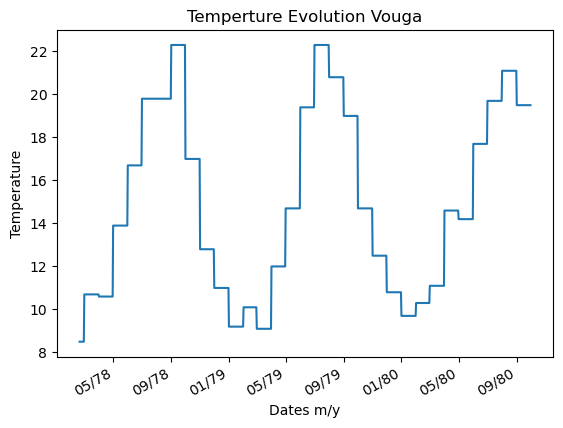

In [17]:
plotDates = [dt.datetime.strptime(d,'%d/%m/%Y').date() for d in dias]

title = "Temperture Evolution " + name
plt.plot(plotDates,temp)
plt.xlabel("Dates m/y")
plt.title(title)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
plt.gcf().autofmt_xdate()
plt.ylabel("Temperature")
plt.savefig("Graphs/"+title.replace(" ","_")+".png")

### Daily precipitation levels

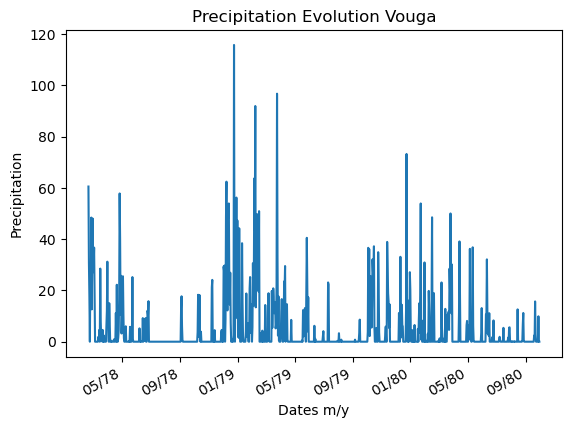

In [18]:
plt.plot(plotDates,prec)
plt.xlabel("Dates m/y")
title = "Precipitation Evolution " +name
plt.title(title)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
plt.gcf().autofmt_xdate()
plt.ylabel("Precipitation")
plt.savefig("Graphs/"+title.replace(" ","_")+".png")

### River Discharge (RD) evolution

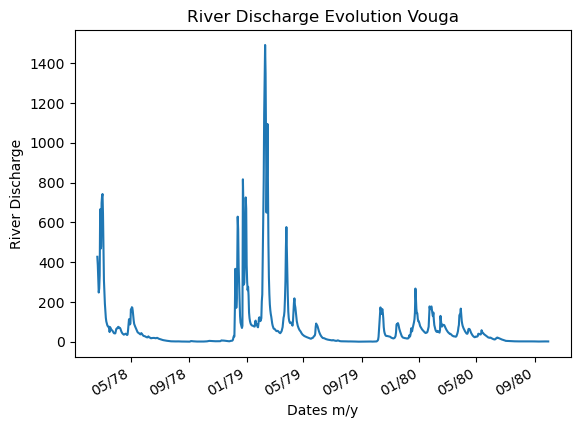

In [19]:


plt.plot(plotDates,y)
plt.xlabel("Dates m/y")
title = "River Discharge Evolution " + name
plt.title(title)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
plt.gcf().autofmt_xdate()
plt.ylabel("River Discharge")
plt.savefig("Graphs/"+title.replace(" ","_")+".png")

### River discharge by year

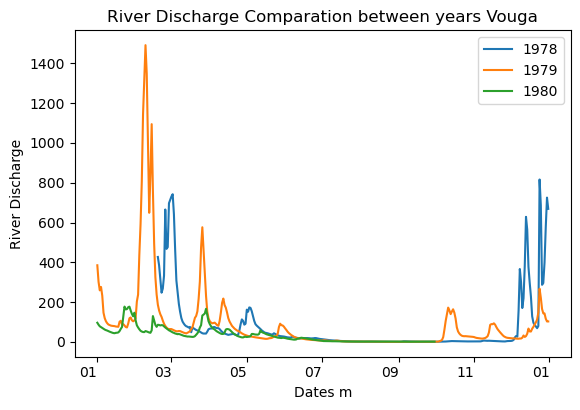

In [20]:
year_data = {}
for i in range(len(plotDates)):
    year = plotDates[i]
    if year.strftime("%Y") not in year_data.keys():
        daymes = plotDates[i].replace(year=2000)
        year_data[year.strftime("%Y")] = [[daymes],[y[i]]]
    else:
        daymes = plotDates[i].replace(year=2000)
        year_data[year.strftime("%Y")][0].append(daymes)
        year_data[year.strftime("%Y")][1].append(y[i])

for key in year_data.keys():
    plt.plot(year_data[key][0],year_data[key][1],label=key)

plt.xlabel("Dates m")
title = "River Discharge Comparation between years " + name 
plt.title(title)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m'))
plt.gcf().autofmt_xdate(rotation=0)
plt.ylabel("River Discharge")
plt.legend()
plt.savefig("Graphs/"+title.replace(" ","_")+".png")
